<a href="https://www.kaggle.com/code/anannoasif/house-price-prediction-stacked?scriptVersionId=156382550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer

%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [5]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
train_ID = train['Id']
test_ID = test['Id']

In [11]:
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

In [12]:
df = pd.concat([train, test])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [14]:
numerical_features = df.select_dtypes(exclude=['object', 'bool', 'category']).columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer

In [16]:
numerical_features.unique()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


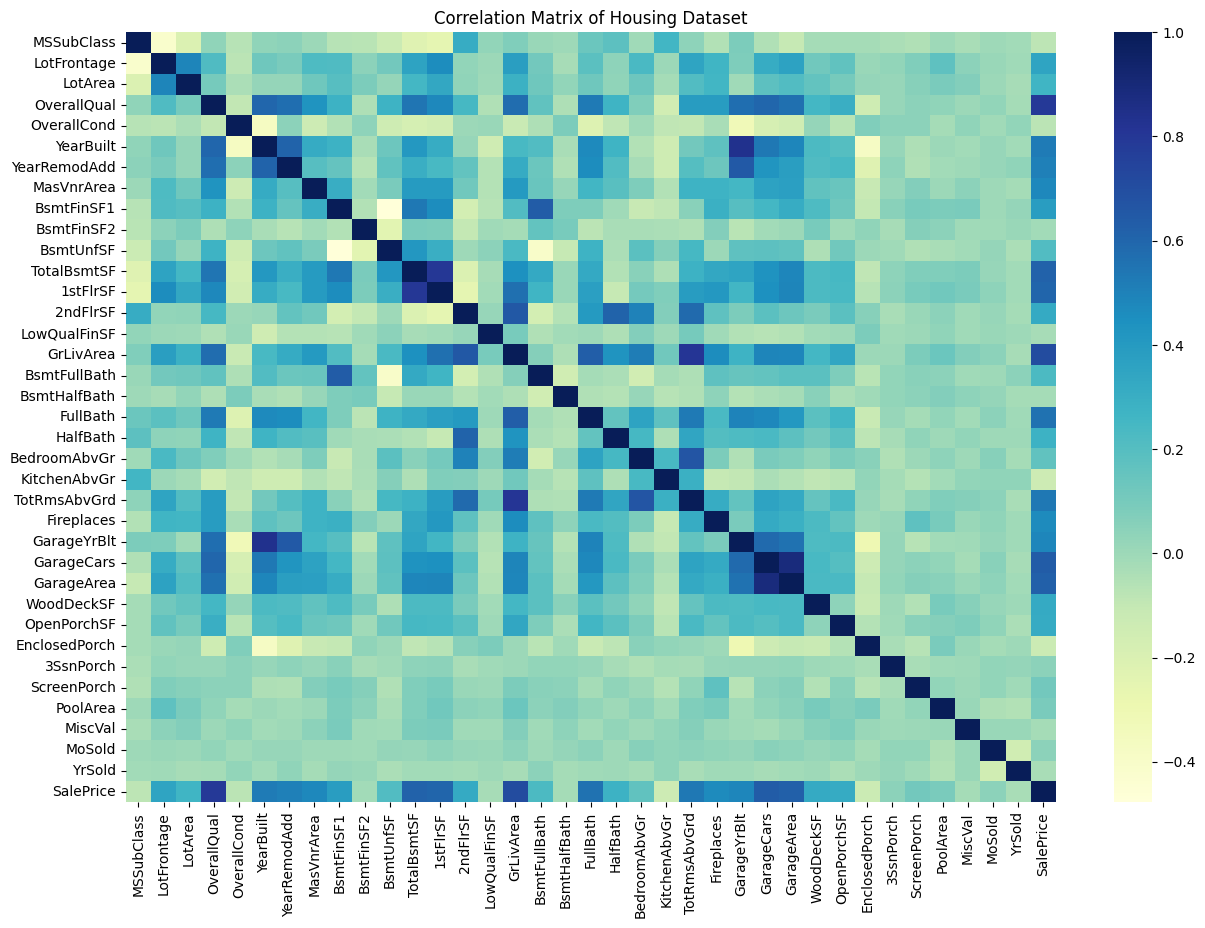

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Housing Dataset')
plt.show()
plt.show()

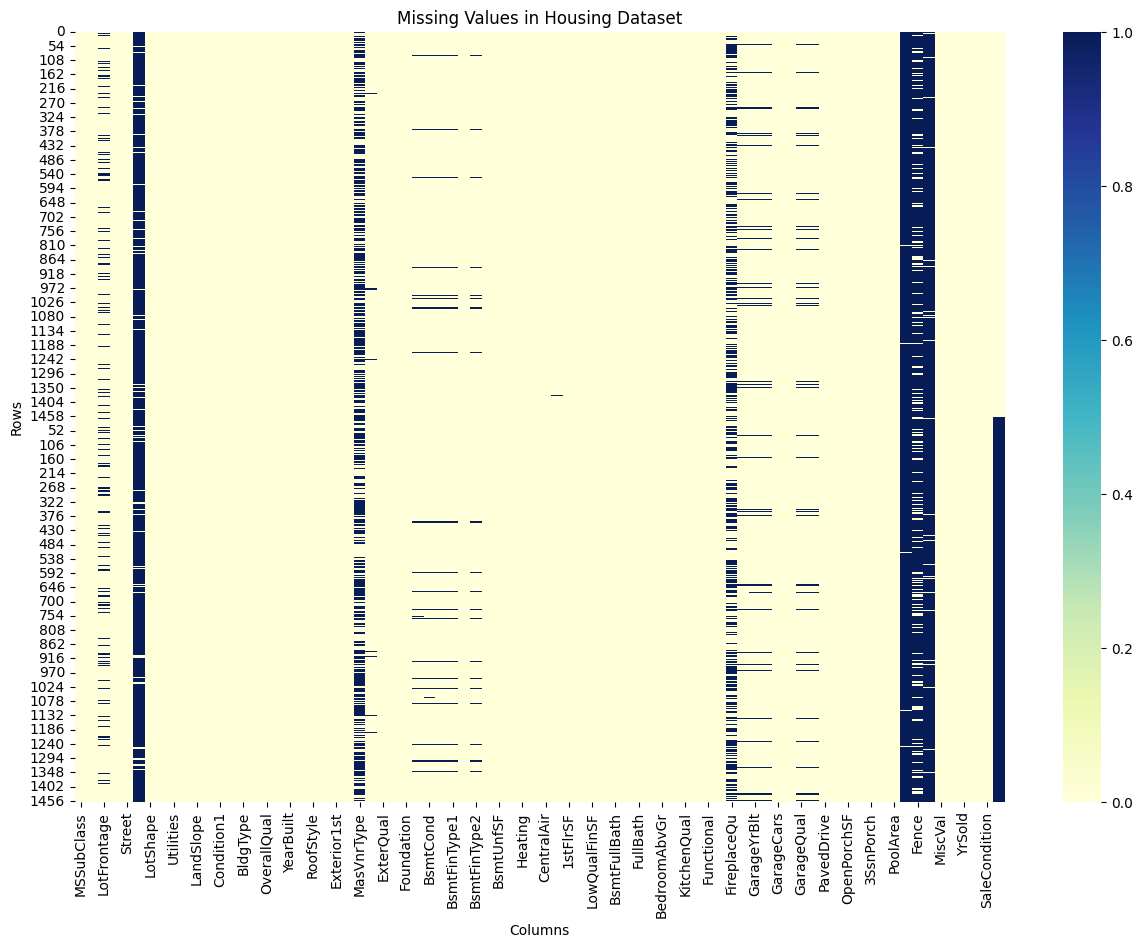

In [20]:
# Create a heatmap using Matplotlib and Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=True)
plt.title('Missing Values in Housing Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [21]:
df['PoolQC'].isna().sum()

2909

In [22]:
df['PoolArea'].isna().sum()

0

In [23]:
df['PoolArea'].sum()

6573

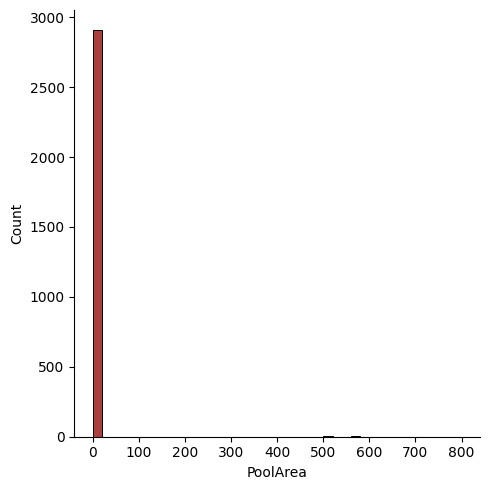

In [24]:
sns.displot(df['PoolArea'].dropna(), kde = False, color = 'darkred', bins =40)

In [25]:
df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738, 144, 368, 444, 228, 561,
       800])

In [26]:
df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738, 144, 368, 444, 228, 561,
       800])

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value='none')

df[categorical_features] = imputer.fit_transform(df[categorical_features])

In [28]:
df['PoolQC'].isna().sum()

0

In [29]:
train['MSSubClass'].isna().sum()

0

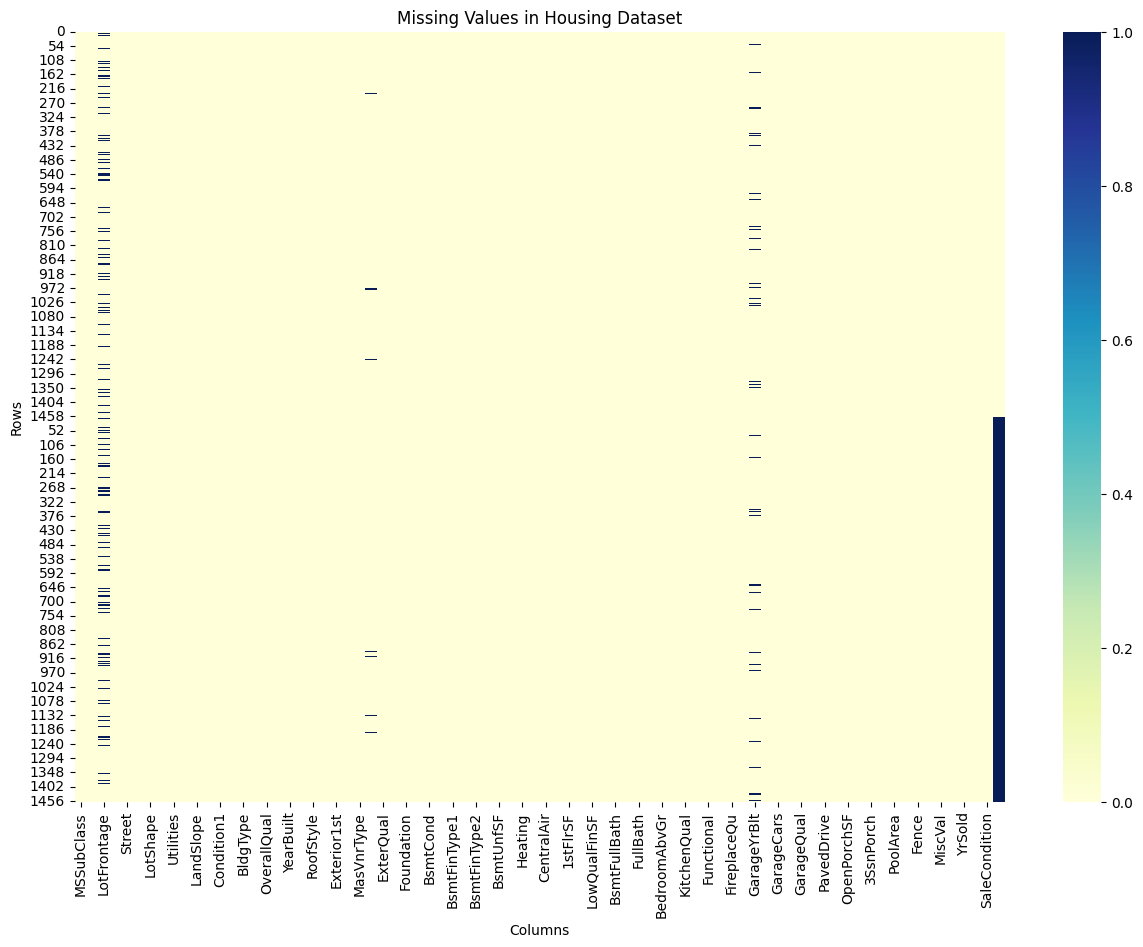

In [30]:
# Create a heatmap using Matplotlib and Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=True)
plt.title('Missing Values in Housing Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [31]:
labelencoder = LabelEncoder()
for col in categorical_features:
    df[col] = labelencoder.fit_transform(df[col])

In [32]:
df['Fence'].isna().sum()

0

In [33]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.,  26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,
        22., 123., 195., 155., 126., 200., 131., 133.])

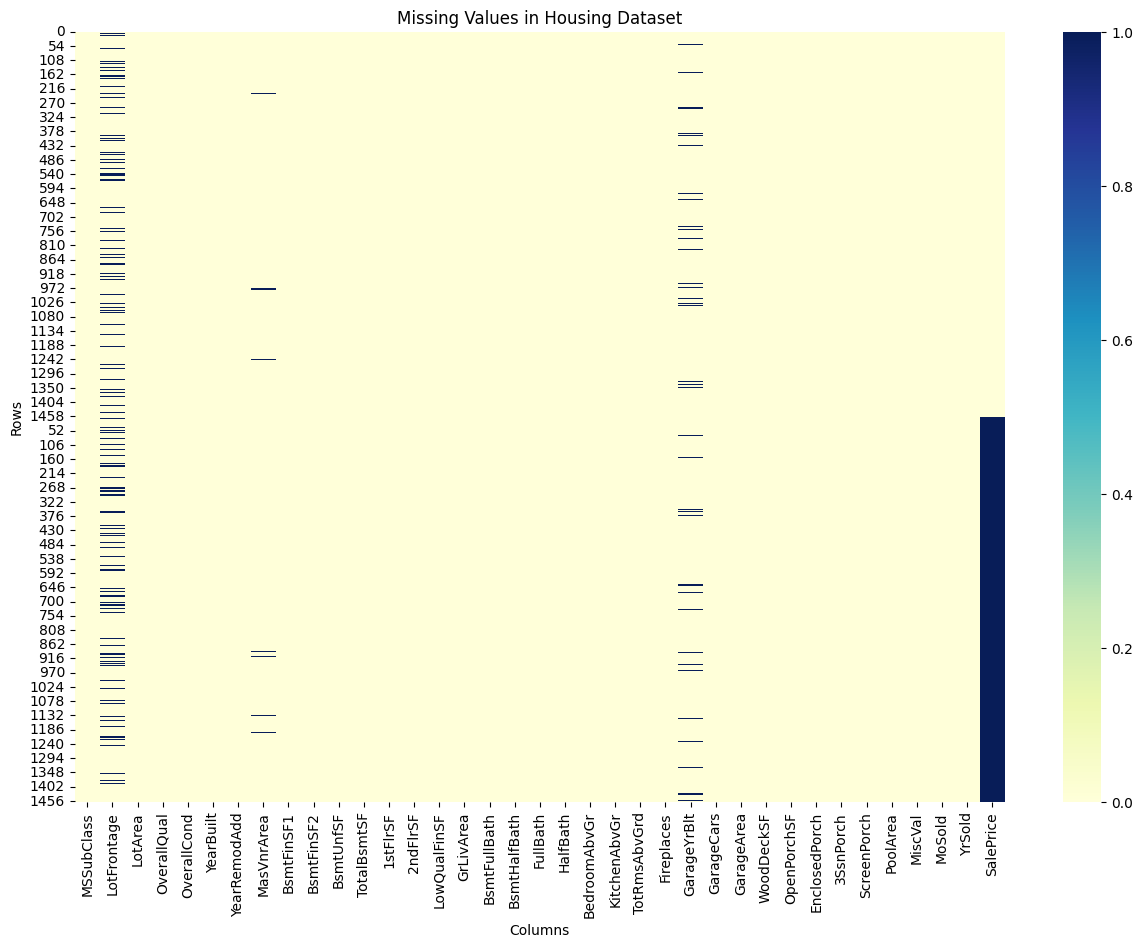

In [34]:
# Create a heatmap using Matplotlib and Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_features].isnull(), cmap='YlGnBu', cbar=True)
plt.title('Missing Values in Housing Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [35]:
test = df[df['SalePrice'].isnull()]
train = df[~df['SalePrice'].isnull()]

In [36]:
imputer = SimpleImputer(strategy='median')

train[numerical_features] = imputer.fit_transform(train[numerical_features])

/tmp/ipykernel_19/348547295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[numerical_features] = imputer.fit_transform(train[numerical_features])


In [37]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [38]:
train_df = train.drop('SalePrice', axis =1)
train_price_df = train[['SalePrice']]

In [39]:
numerical_features_train = train_df.select_dtypes(exclude=['object', 'bool', 'category']).columns

In [40]:
power_transformer = PowerTransformer()

train_df[numerical_features_train] = power_transformer.fit_transform(train_df[numerical_features_train])


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [41]:
train = pd.concat([train_df, train_price_df], axis=1)

In [42]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.493460,-0.185595,-0.146062,-0.141171,0.064238,0.257821,0.752862,0.337049,-0.02618,0.617130,...,-0.069409,0.069409,0.487262,0.195977,-0.192177,-1.694229,0.140053,0.388981,0.032281,208500.0
1,-1.164269,-0.185595,0.546852,0.105609,0.064238,0.257821,0.752862,0.337049,-0.02618,-1.050571,...,-0.069409,0.069409,0.487262,0.195977,-0.192177,-0.444891,-0.613715,0.388981,0.032281,181500.0
2,0.493460,-0.185595,-0.000631,0.413721,0.064238,0.257821,-1.371959,0.337049,-0.02618,0.617130,...,-0.069409,0.069409,0.487262,0.195977,-0.192177,0.987490,0.140053,0.388981,0.032281,223500.0
3,0.698191,-0.185595,-0.397299,0.095490,0.064238,0.257821,-1.371959,0.337049,-0.02618,-1.738092,...,-0.069409,0.069409,0.487262,0.195977,-0.192177,-1.694229,-1.368874,0.388981,-2.599251,140000.0
4,0.493460,-0.185595,0.718695,0.877127,0.064238,0.257821,-1.371959,0.337049,-0.02618,-1.050571,...,-0.069409,0.069409,0.487262,0.195977,-0.192177,1.963461,0.140053,0.388981,0.032281,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.493460,-0.185595,-0.295410,-0.266808,0.064238,0.257821,0.752862,0.337049,-0.02618,0.617130,...,-0.069409,0.069409,0.487262,0.195977,-0.192177,0.646025,-0.613715,0.388981,0.032281,175000.0
1456,-1.164269,-0.185595,0.760913,0.722071,0.064238,0.257821,0.752862,0.337049,-0.02618,0.617130,...,-0.069409,0.069409,-2.014081,0.195977,-0.192177,-1.694229,1.643336,0.388981,0.032281,210000.0
1457,0.698191,-0.185595,-0.097163,-0.010330,0.064238,0.257821,0.752862,0.337049,-0.02618,0.617130,...,-0.069409,0.069409,-2.153459,-5.102652,5.203549,-0.444891,1.643336,0.388981,0.032281,266500.0
1458,-1.164269,-0.185595,-0.000631,0.129088,0.064238,0.257821,0.752862,0.337049,-0.02618,0.617130,...,-0.069409,0.069409,0.487262,0.195977,-0.192177,-0.838080,1.643336,0.388981,0.032281,142125.0


In [43]:
test_df = test.drop('SalePrice', axis =1)

In [44]:
test_price_df = test[['SalePrice']]

In [45]:
test_price_df

,SalePrice
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


In [46]:
test_df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [47]:
numerical_features_test = test_df.select_dtypes(exclude=['object', 'bool', 'category']).columns

In [48]:
imputer = SimpleImputer(strategy='median')

test_df[numerical_features_test] = imputer.fit_transform(test_df[numerical_features_test])

In [49]:
test_df[numerical_features_test] = power_transformer.fit_transform(test_df[numerical_features_test])

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [50]:
test_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [51]:
test = pd.concat([test_df, test_price_df], axis=1)

In [52]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.153867,-1.562779,0.600098,0.528189,0.06426,0.281322,0.744390,0.335946,-0.03705,0.585590,...,-0.06426,0.045392,-1.948722,0.190320,-0.190320,0.015538,1.712024,0.391494,0.028350,NaN
1,-1.153867,-0.191341,0.646171,1.012427,0.06426,0.281322,-1.378319,0.335946,-0.03705,-1.814462,...,-0.06426,0.045392,0.497734,-5.254317,5.254317,0.015538,1.712024,0.391494,0.028350,NaN
2,0.484391,-0.191341,0.319731,0.936778,0.06426,0.281322,-1.378319,0.335946,-0.03705,0.585590,...,-0.06426,0.045392,-1.948722,0.190320,-0.190320,-1.150866,1.712024,0.391494,0.028350,NaN
3,0.484391,-0.191341,0.507404,0.189212,0.06426,0.281322,-1.378319,0.335946,-0.03705,0.585590,...,-0.06426,0.045392,0.497734,0.190320,-0.190320,0.015538,1.712024,0.391494,0.028350,NaN
4,1.344816,-0.191341,-1.267302,-1.143126,0.06426,0.281322,-1.378319,-2.998189,-0.03705,0.585590,...,-0.06426,0.045392,0.497734,0.190320,-0.190320,-2.065453,1.712024,0.391494,0.028350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.665737,1.782236,-2.631453,-2.535122,0.06426,0.281322,0.744390,0.335946,-0.03705,0.585590,...,-0.06426,0.045392,0.497734,0.190320,-0.190320,0.015538,-1.361163,0.391494,0.028350,NaN
1455,1.665737,1.782236,-2.631453,-2.562266,0.06426,0.281322,0.744390,0.335946,-0.03705,0.585590,...,-0.06426,0.045392,0.497734,0.190320,-0.190320,-0.742360,-1.361163,0.391494,-2.644465,NaN
1456,-1.153867,-0.191341,3.874678,1.887264,0.06426,0.281322,0.744390,0.335946,-0.03705,0.585590,...,-0.06426,0.045392,0.497734,0.190320,-0.190320,1.052676,-1.361163,0.391494,-2.644465,NaN
1457,0.932679,-0.191341,-0.263657,0.288198,0.06426,0.281322,0.744390,0.335946,-0.03705,0.585590,...,-0.06426,0.045392,-1.948722,-5.254317,5.254317,0.372332,-1.361163,0.391494,0.028350,NaN


In [53]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [54]:
X = train.drop('SalePrice', axis = 1 )
X.tail()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1455,0.493460,-0.185595,-0.295410,-0.266808,0.064238,0.257821,0.752862,0.337049,-0.02618,0.61713,...,-0.293785,-0.069409,0.069409,0.487262,0.195977,-0.192177,0.646025,-0.613715,0.388981,0.032281
1456,-1.164269,-0.185595,0.760913,0.722071,0.064238,0.257821,0.752862,0.337049,-0.02618,0.61713,...,-0.293785,-0.069409,0.069409,-2.014081,0.195977,-0.192177,-1.694229,1.643336,0.388981,0.032281
1457,0.698191,-0.185595,-0.097163,-0.010330,0.064238,0.257821,0.752862,0.337049,-0.02618,0.61713,...,-0.293785,-0.069409,0.069409,-2.153459,-5.102652,5.203549,-0.444891,1.643336,0.388981,0.032281
1458,-1.164269,-0.185595,-0.000631,0.129088,0.064238,0.257821,0.752862,0.337049,-0.02618,0.61713,...,-0.293785,-0.069409,0.069409,0.487262,0.195977,-0.192177,-0.838080,1.643336,0.388981,0.032281
1459,-1.164269,-0.185595,0.324920,0.172505,0.064238,0.257821,0.752862,0.337049,-0.02618,0.61713,...,-0.293785,-0.069409,0.069409,0.487262,0.195977,-0.192177,-0.068307,0.140053,0.388981,0.032281


In [55]:
y = train['SalePrice']
y.tail()


1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, dtype: float64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Split the training data into train and validation sets
X_train_stacked, X_val_stacked, y_train_stacked, y_val_stacked = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [58]:
# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [59]:
# Initialize base models
xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor()
cb_model = cb.CatBoostRegressor()



In [60]:
# Fit base models
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

Learning rate set to 0.040504
0:	learn: 74599.5253657	total: 54.8ms	remaining: 54.8s
1:	learn: 72950.0490777	total: 55.7ms	remaining: 27.8s
2:	learn: 71096.1962096	total: 57.5ms	remaining: 19.1s
3:	learn: 69444.3521404	total: 59.3ms	remaining: 14.8s
4:	learn: 67999.2498046	total: 61.1ms	remaining: 12.2s
5:	learn: 66407.6217214	total: 63.1ms	remaining: 10.5s
6:	learn: 64910.3850299	total: 65.1ms	remaining: 9.24s
7:	learn: 63335.7067354	total: 67ms	remaining: 8.31s
8:	learn: 61901.3824242	total: 68.9ms	remaining: 7.59s
9:	learn: 60576.3666896	total: 70.8ms	remaining: 7.01s
10:	learn: 59348.6898670	total: 72.7ms	remaining: 6.54s
11:	learn: 58168.6058722	total: 74.5ms	remaining: 6.14s
12:	learn: 56976.0815932	total: 76.5ms	remaining: 5.8s
13:	learn: 55837.0204509	total: 78.4ms	remaining: 5.52s
14:	learn: 54727.6238749	total: 80.3ms	remaining: 5.28s
15:	learn: 53649.5372385	total: 82.2ms	remaining: 5.06s
16:	learn: 52521.0420499	total: 84.1ms	remaining: 4.86s
17:	learn: 51531.8649039	total:

In [61]:
# Make predictions on validation data
xgb_pred = xgb_model.predict(X_val)
lgb_pred = lgb_model.predict(X_val)
cb_pred = cb_model.predict(X_val)

# Create a new dataset with predictions as features
stacked_predictions = pd.DataFrame({
    'XGBoost': xgb_pred,
    'LightGBM': lgb_pred,
    'CatBoost': cb_pred
})


In [62]:

# Initialize meta-model (linear regression, for example)
meta_model = Ridge()
meta_model.fit(stacked_predictions, y_val)

# Generate predictions on test set
xgb_test_pred = xgb_model.predict(X_test)
lgb_test_pred = lgb_model.predict(X_test)
cb_test_pred = cb_model.predict(X_test)

# Create stacked predictions for test set
stacked_test_predictions = pd.DataFrame({
    'XGBoost': xgb_test_pred,
    'LightGBM': lgb_test_pred,
    'CatBoost': cb_test_pred
})

In [63]:
# Make final predictions using meta-model
final_predictions = meta_model.predict(stacked_test_predictions)

r2_train = r2_score(y_train[:len(stacked_predictions)], meta_model.predict(stacked_predictions))
print(f"R2 score on train set: {r2_train}")

r2_val = r2_score(y_val, meta_model.predict(stacked_predictions))
print(f"R2 score on val set: {r2_val}")

R2 score on train set: -0.7675611166461442
R2 score on val set: 0.906248709054086


In [64]:
Xt = test.drop('SalePrice', axis = 1)
Xt.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,1.665737,1.782236,-2.631453,-2.535122,0.06426,0.281322,0.74439,0.335946,-0.03705,0.58559,...,-0.325793,-0.06426,0.045392,0.497734,0.190320,-0.190320,0.015538,-1.361163,0.391494,0.028350
1455,1.665737,1.782236,-2.631453,-2.562266,0.06426,0.281322,0.74439,0.335946,-0.03705,0.58559,...,-0.325793,-0.06426,0.045392,0.497734,0.190320,-0.190320,-0.742360,-1.361163,0.391494,-2.644465
1456,-1.153867,-0.191341,3.874678,1.887264,0.06426,0.281322,0.74439,0.335946,-0.03705,0.58559,...,-0.325793,-0.06426,0.045392,0.497734,0.190320,-0.190320,1.052676,-1.361163,0.391494,-2.644465
1457,0.932679,-0.191341,-0.263657,0.288198,0.06426,0.281322,0.74439,0.335946,-0.03705,0.58559,...,-0.325793,-0.06426,0.045392,-1.948722,-5.254317,5.254317,0.372332,-1.361163,0.391494,0.028350
1458,0.484391,-0.191341,0.319731,0.112128,0.06426,0.281322,0.74439,0.335946,-0.03705,0.58559,...,-0.325793,-0.06426,0.045392,0.497734,0.190320,-0.190320,1.697756,-1.361163,0.391494,0.028350


In [65]:
yt = test['SalePrice']
yt.tail()

1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, dtype: float64

In [66]:
# Generate predictions on test set
xgb_Xt_pred = xgb_model.predict(Xt)
lgb_Xt_pred = lgb_model.predict(Xt)
cb_Xt_pred = cb_model.predict(Xt)

# Create stacked predictions for test set
stacked_Xt_predictions = pd.DataFrame({
    'XGBoost': xgb_Xt_pred,
    'LightGBM': lgb_Xt_pred,
    'CatBoost': cb_Xt_pred
})

In [67]:
# Predicting on the test set
test_predictions = meta_model.predict(stacked_Xt_predictions)
# Creating a submission CSV for the external test data
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = test_predictions
sub.to_csv('submission2.csv',index=False)